In [1]:
using ProRF, Printf, Statistics

In [2]:
R = RF("Data/Ube4b")
X, Y, L = get_data(R, 'B', norm=true);

In [3]:
RI = RFI(R, 2:1:4, 100:100:300)

RFI("Data/Ube4b/data.fasta", "Data/Ube4b/data.xlsx", 1072, 2:1:4, 100:100:300)

In [3]:
size(X)

(89642, 102)

In [ ]:
MZ, SZ = iter_get_reg_value(RI, X, Y, 2)

In [10]:
MZ

3×3 Matrix{Float64}:
 0.0909809  0.0907936  0.0907858
 0.0911561  0.091044   0.0909968
 0.0925164  0.0923953  0.0923493

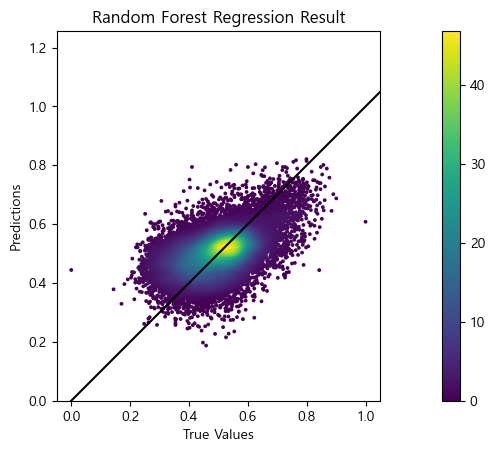

NRMSE : 0.082835


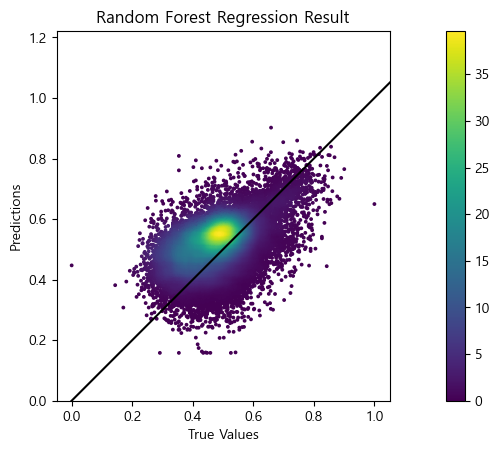

NRMSE : 0.087190


RandomForestRegressor
n_trees:             400
n_subfeatures:       10
partial_sampling:    0.7
max_depth:           -1
min_samples_leaf:    1
min_samples_split:   2
min_purity_increase: 0.0
ensemble:            Ensemble of Decision Trees
Trees:      400
Avg Leaves: 30807.7825
Avg Depth:  314.2275

In [13]:
data_state, learn_state = @seed, @seed
rf_model(X, Y, 2, 400, data_state=data_state, learn_state=learn_state)
rf_model(X, Y, 10, 400, data_state=data_state, learn_state=learn_state)

In [6]:
ans = Vector{Vector{Float64}}()
for i in 1:4
    println(i)
    data_state, learn_state = @seed, @seed
    nrmse_vector = Vector{Float64}()
    for d in 50:20:150
        push!(nrmse_vector, rf_nrmse(X, Y, 2, 400, max_depth=d, val_mode=true, data_state=data_state, learn_state=learn_state)[2])
    end
    push!(ans, nrmse_vector)
end
ans = Matrix{Float64}(hcat(ans...))
sans = std.(eachrow(ans))
mans = mean.(eachrow(ans))

1


2

3

4

6-element Vector{Float64}:
 0.09931174649594193
 0.09677228380119347
 0.09547864972235501
 0.09529139719141366
 0.09564045673692562
 0.09656999378273007

In [7]:
sans

6-element Vector{Float64}:
 0.005571087508744174
 0.0052691919153346435
 0.005213987697263304
 0.0051166323347417815
 0.005110236311742758
 0.005279326001660643

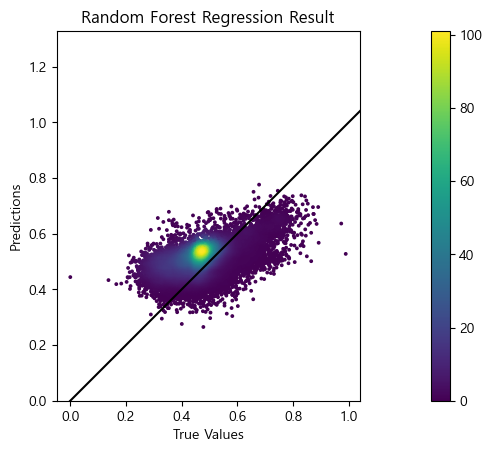

NRMSE : 0.078546


RandomForestRegressor
n_trees:             400
n_subfeatures:       2
partial_sampling:    0.7
max_depth:           110
min_samples_leaf:    1
min_samples_split:   2
min_purity_increase: 0.0
ensemble:            Ensemble of Decision Trees
Trees:      400
Avg Leaves: 13469.4825
Avg Depth:  110.0

In [8]:
rf_model(X, Y, 2, 400, max_depth=110)